# Author: Farhana Hoque

# Project name:Housing prediction 

## Import librarires

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

## Import

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    #subset to datset for "Capital Federal"
    mask_ba=df["place_with_parent_names"].str.contains("Capital Federal")
    #subset for aprtment
    mask_apt=df["property_type"]=="apartment"
    #subset to price_approx_usd<400_000
    mask_price=df["price_aprox_usd"]<400_000
    #subset
    df=df[mask_ba & mask_apt &  mask_price]
    #remove outliers
    low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[ mask_area]
    return df

In [3]:
df = wrangle(r"F:\A.WQU Projects\project-2\buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   lat-lon                     1300 non-null   object 
 4   price                       1343 non-null   float64
 5   currency                    1343 non-null   object 
 6   price_aprox_local_currency  1343 non-null   float64
 7   price_aprox_usd             1343 non-null   float64
 8   surface_total_in_m2         965 non-null    float64
 9   surface_covered_in_m2       1343 non-null   float64
 10  price_usd_per_m2            927 non-null    float64
 11  price_per_m2                1343 non-null   float64
 12  floor                       379 non-null    float64
 13  rooms                       1078 

## Exploratory data Analysis

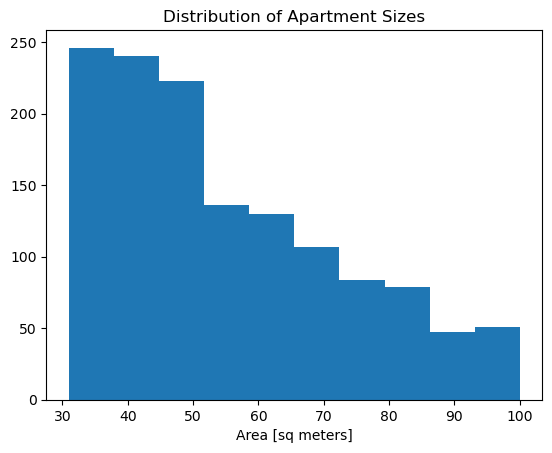

In [5]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [6]:
df.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.343000e+03,1.343000e+03,1343.000000,965.000000,1343.000000,927.000000,1343.000000,379.000000,1078.000000,349.000000
mean,2.204582e+05,2.054927e+06,135527.838719,59.883938,55.076694,2244.163063,4285.479770,11.155673,2.364564,1923.163324
std,4.151182e+05,9.033095e+05,59575.630208,26.621969,18.160427,639.740608,7987.685558,50.138692,0.902759,1224.444180
min,2.727900e+04,4.136151e+05,27279.000000,0.000000,31.000000,513.513514,808.148936,1.000000,1.000000,1.000000
25%,9.325000e+04,1.394941e+06,92000.000000,42.000000,40.000000,1826.505017,1975.872093,2.000000,2.000000,1100.000000
50%,1.259000e+05,1.819935e+06,120029.460000,55.000000,50.000000,2141.519231,2411.764706,4.000000,2.000000,1670.000000
75%,1.750000e+05,2.425984e+06,160000.000000,75.000000,68.500000,2578.183144,2964.814815,7.000000,3.000000,2500.000000
max,5.487000e+06,5.989148e+06,395000.000000,229.000000,100.000000,5777.777778,57156.250000,616.000000,6.000000,7456.000000


In [7]:
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

In [8]:
df["surface_covered_in_m2"].quantile([0.1,0.9])

0.1    35.0
0.9    84.0
Name: surface_covered_in_m2, dtype: float64

In [9]:
low,high=df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area=df["surface_covered_in_m2"].between(low,high)
mask_area

4       True
9       True
29      True
40      True
41      True
        ... 
8589    True
8590    True
8593    True
8601    True
8604    True
Name: surface_covered_in_m2, Length: 1343, dtype: bool

### Task 2.1.7: Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]".

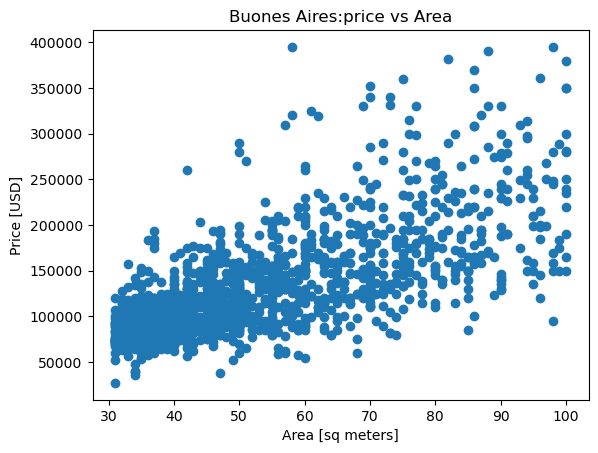

In [10]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buones Aires:price vs Area");

# Split

### A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

### Task 2.1.8: Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [11]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)

### Task 2.1.9: Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [12]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

# Build Model

### Baseline
The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

## Task 2.1.10: Calculate the mean of your target vector y_train and assign it to the variable y_mean.

In [13]:
y_mean = y_train.mean()
y_mean

135527.83871928515

### Task 2.1.11: Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [14]:
y_pred_baseline = [y_mean]* len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

### So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above.

### Task 2.1.12: Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

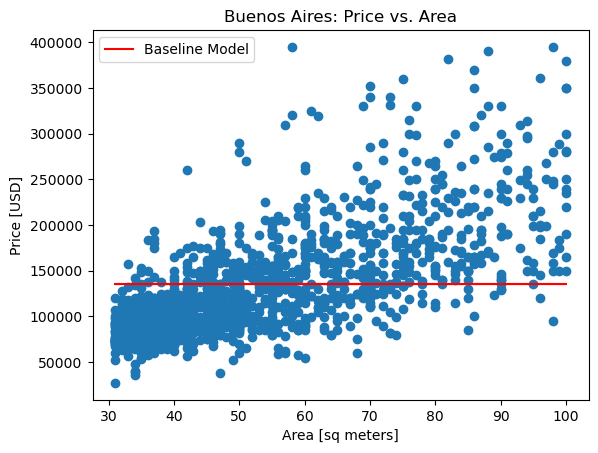

In [15]:
plt.plot(X_train.values,y_pred_baseline,color="red",label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

### Task 2.1.13: Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [16]:
mae_baseline = mean_absolute_error (y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What does this information tell us? If we always predicted that an apartment price is $ 135,527.84, our predictions would be off by an average of $45,199.46. It also tells us that our model needs to have mean absolute error below $ 45,199.46 in order to be useful.

# Iterate

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train , y_train)

LinearRegression()

In [36]:
check_is_fitted(model)

### Task 2.1.16: Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [21]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

### Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error.

### Task 2.1.17: Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

In [23]:
mae_training= mean_absolute_error(y_train,y_pred_training)
print("Training MAE:",round(mae_training,2))

Training MAE: 31248.26


### Task 2.1.18: Run the code below to import your test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.

In [26]:
X_test =pd.read_csv(r"F:\A.WQU Projects\project-2\buenos-aires-test-features.csv")
X_test = X_test[features]
# Generate predictions
y_pred_test = pd.Series(model.predict(X_test))

# Display the first few predictions
y_pred_test.head()

0    117330.058901
1    135355.037823
2     88039.468152
3     88039.468152
4    106064.447074
dtype: float64

### Task 2.1.19: Extract the intercept from your model, and assign it to the variable intercept.

In [27]:
intercept =round(model.intercept_ ,2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


Next comes the coefficient. We'll extract it in a very similar way.

### Task 2.1.20: Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.

In [28]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


Now that we have our intercept and coefficient, we need to insert them into a string that we can print out the complete equation.

### Task 2.1.21: Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [29]:
print(f"apt_price={intercept} +{coefficient} * surface_covered")

apt_price=11433.31 +2253.12 * surface_covered


Equation might work for some technical audiences, but visualization or generally much more effective communication tool — especially for non-technical audiences. So let's use the scatter plot we made at the beginning of this lesson and plot the line that that are equation would make.

### Task 2.1.22: Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model".

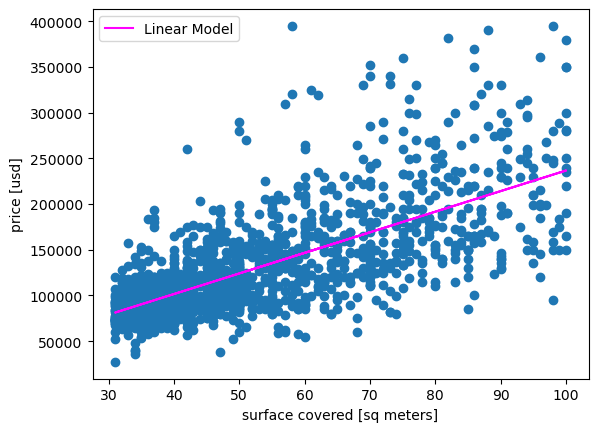

In [35]:
plt.plot(X_train.values,model.predict(X_train),color="magenta",label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();